<table style="width:100%; text-align:center;">
  <tr>
    <th style="text-align:center;" colspan="2">CSC 562: AI Research Project Assignment</th>
  </tr>
  <tr>
    <td style="text-align:center;" colspan="2">From Data to Decisions: Utilizing a Hybrid Deep Learning and Deep Reinforcement Learning Approach for Bitcoin Trading</td>
  </tr>
  <tr>
    <th style="text-align:center;">Name</th>

  </tr>
  <tr>
    <td style="text-align:center;">Alanoud Almajed</td>
  
  </tr>
   <tr>
    <td style="text-align:center;">Reem Alshehri</td>
   
  </tr>
  
    
</table>



# Import Libraries


In [73]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt


In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
# Load each dataset
bitcoin_data = pd.read_csv('/content/drive/MyDrive/dataset/BTC_USD Historical Data.csv')
dowjones_data = pd.read_csv('/content/drive/MyDrive/dataset/Dow Jones .csv')
nasdaq_data = pd.read_csv('/content/drive/MyDrive/dataset/NASDAQ .csv')
gold_data = pd.read_excel('/content/drive/MyDrive/dataset/Gold.xlsx')
SP_data= pd.read_csv("/content/drive/MyDrive/dataset/S&P 500.csv")

In [76]:
# Convert date columns to datetime format
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'], errors='coerce')
dowjones_data['Date'] = pd.to_datetime(dowjones_data['Date'], errors='coerce')
nasdaq_data['Date'] = pd.to_datetime(nasdaq_data['Date'], errors='coerce')
gold_data['Date'] = pd.to_datetime(gold_data['Date'], errors='coerce')
SP_data['Date'] = pd.to_datetime(SP_data['Date'], errors='coerce')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [77]:
# max()
print(bitcoin_data['Date'].max())
print(dowjones_data['Date'].max())
print(nasdaq_data['Date'].max())
print(gold_data['Date'].max())
print(SP_data['Date'].max())

2024-09-30 00:00:00
2024-09-30 00:00:00
2024-09-30 00:00:00
2024-09-30 00:00:00
2024-09-30 00:00:00


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [78]:
# Select only the "Date" and "Price" columns
dowjones_data = dowjones_data[['Date', 'Price']]
nasdaq_data= nasdaq_data[['Date', 'Price']]
SP_data =SP_data[['Date', 'Price']]

In [79]:

bitcoin_data = bitcoin_data.rename(columns={'Price': 'BTC_Price'})
bitcoin_data = bitcoin_data.rename(columns={'Open': 'BTC_Open'})
bitcoin_data = bitcoin_data.rename(columns={'High': 'BTC_High'})
bitcoin_data = bitcoin_data.rename(columns={'Low': 'BTC_Low'})
bitcoin_data = bitcoin_data.rename(columns={'Vol.': 'BTC_Vol.'})
bitcoin_data = bitcoin_data.rename(columns={'Change': 'BTC_Change'})
dowjones_data = dowjones_data.rename(columns={'Price': 'DowJones_Price'})
nasdaq_data = nasdaq_data.rename(columns={'Price': 'Nasdaq_Price'})
SP_data = SP_data.rename(columns={'Price': 'S&P_Price'})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [80]:
# Merge the datasets( Historical data + Economic indicators ) with an outer join to keep all dates
HE = pd.merge(bitcoin_data, dowjones_data, on='Date', how='outer')
HE = pd.merge(HE, nasdaq_data, on='Date', how='outer')
HE = pd.merge(HE, SP_data, on='Date', how='outer')
HE = pd.merge(HE, gold_data, on='Date', how='outer')
#HE = pd.merge(HE, Brent_Oil, on='Date', how='outer')

# Sort the data by date to ensure proper order
HE = HE.sort_values(by='Date').reset_index(drop=True)



In [81]:
HE

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Date,BTC_Price,BTC_Open,BTC_High,BTC_Low,BTC_Vol.,Change %,DowJones_Price,Nasdaq_Price,S&P_Price,Gold_Price
0,2015-01-01,313.9,317.5,317.5,312.9,0.93K,-0.99%,NaN,NaN,NaN,1185.4
1,2015-01-02,315.1,313.6,316.0,313.0,1.32K,0.40%,"17,832.99","4,726.81","2,058.20",1187.6
2,2015-01-03,282.0,314.8,314.8,282.0,1.30K,-10.51%,NaN,NaN,NaN,1189.8
3,2015-01-04,258.8,282.0,288.9,258.8,2.38K,-8.23%,NaN,NaN,NaN,NaN
4,2015-01-05,273.2,261.0,276.5,260.5,2.68K,5.57%,"17,501.65","4,652.57","2,020.60",1204.0
...,...,...,...,...,...,...,...,...,...,...,...
3555,2024-09-26,"65,307.0","63,264.0","65,856.0","62,805.0",0.86K,3.23%,"42,175.11","18,190.29","5,745.37",2694.9
3556,2024-09-27,"65,928.0","65,307.0","66,548.0","64,987.0",0.67K,0.95%,"42,313.00","18,119.59","5,738.17",2644.3
3557,2024-09-28,"66,015.0","65,928.0","66,410.0","65,568.0",0.11K,0.13%,NaN,NaN,NaN,NaN
3558,2024-09-29,"65,762.0","66,015.0","66,193.0","65,574.0",0.09K,-0.38%,NaN,NaN,NaN,NaN


In [82]:
# API scrap data BrentOil
url = "https://api.eia.gov/v2/petroleum/pri/spt/data/"
params = {
    "api_key": "ID2PfupJmuavOIyurfbifgqnSUItjTtwWQCjyJcM",  # Replace with your actual API key
    "frequency": "daily",
    "data[0]": "value",
    "facets[series][]": "RBRTE",
    "start": "2015-01-01",
    "end": "2024-09-30",
    "sort[0][column]": "period",
    "sort[0][direction]": "desc",
    "offset": 0,
    "length": 5000
}

# Fetch the data
response = requests.get(url, params=params)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()

    # Extract the relevant part of the JSON
    records = data.get("response", {}).get("data", [])

    # Create a DataFrame and drop the 'duoarea' column
    brent_oil = pd.DataFrame(records).drop(columns=["duoarea"], errors="ignore")
   # Filter the DataFrame to retain only 'period' and 'value' columns
    brent_oil = brent_oil[['period', 'value']]

   #rename the columns
    brent_oil.rename(columns={'period': 'Date', 'value': 'BrentOil_Price'}, inplace=True)

   #Display the updated DataFrame
    brent_oil
    brent_oil.to_excel("BrentOil.xlsx", index=False)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [83]:
brent_oil

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Date,BrentOil_Price
0,2024-09-30,72.35
1,2024-09-27,71.63
2,2024-09-26,73.06
3,2024-09-25,75.4
4,2024-09-24,75.29
...,...,...
2473,2015-01-08,49.43
2474,2015-01-07,49.06
2475,2015-01-06,50.12
2476,2015-01-05,51.08


In [84]:
# Convert to datetime format
HE['Date'] = pd.to_datetime(HE['Date'])
brent_oil['Date'] = pd.to_datetime(brent_oil['Date'])

# Merge datasets
HE = pd.merge(HE, brent_oil, on='Date', how='outer')

# Sort by Date
HE = HE.sort_values(by='Date').reset_index(drop=True)

# Display the merged dataset

HE

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Date,BTC_Price,BTC_Open,BTC_High,BTC_Low,BTC_Vol.,Change %,DowJones_Price,Nasdaq_Price,S&P_Price,Gold_Price,BrentOil_Price
0,2015-01-01,313.9,317.5,317.5,312.9,0.93K,-0.99%,NaN,NaN,NaN,1185.4,NaN
1,2015-01-02,315.1,313.6,316.0,313.0,1.32K,0.40%,"17,832.99","4,726.81","2,058.20",1187.6,55.38
2,2015-01-03,282.0,314.8,314.8,282.0,1.30K,-10.51%,NaN,NaN,NaN,1189.8,NaN
3,2015-01-04,258.8,282.0,288.9,258.8,2.38K,-8.23%,NaN,NaN,NaN,NaN,NaN
4,2015-01-05,273.2,261.0,276.5,260.5,2.68K,5.57%,"17,501.65","4,652.57","2,020.60",1204.0,51.08
...,...,...,...,...,...,...,...,...,...,...,...,...
3555,2024-09-26,"65,307.0","63,264.0","65,856.0","62,805.0",0.86K,3.23%,"42,175.11","18,190.29","5,745.37",2694.9,73.06
3556,2024-09-27,"65,928.0","65,307.0","66,548.0","64,987.0",0.67K,0.95%,"42,313.00","18,119.59","5,738.17",2644.3,71.63
3557,2024-09-28,"66,015.0","65,928.0","66,410.0","65,568.0",0.11K,0.13%,NaN,NaN,NaN,NaN,NaN
3558,2024-09-29,"65,762.0","66,015.0","66,193.0","65,574.0",0.09K,-0.38%,NaN,NaN,NaN,NaN,NaN


#  PRE-PROCESSING

In [85]:
HE.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Date,datetime64[ns]
BTC_Price,object
BTC_Open,object
BTC_High,object
BTC_Low,object
BTC_Vol.,object
Change %,object
DowJones_Price,object
Nasdaq_Price,object
S&P_Price,object


In [86]:
HE.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Date,0
BTC_Price,1
BTC_Open,1
BTC_High,1
BTC_Low,1
BTC_Vol.,11
Change %,1
DowJones_Price,1108
Nasdaq_Price,1108
S&P_Price,1108


In [87]:
HE = HE.dropna(subset=['BTC_Vol.'])

In [88]:
HE = HE.rename(columns={'Change %': 'Change'})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [89]:
# Function to convert values with 'K', 'M', or 'B' to numeric
def convert_volume(value):
    if 'K' in value:
        return float(value.replace('K', '')) * 1_000  # Convert 'K' to thousands
    elif 'M' in value:
        return float(value.replace('M', '')) * 1_000_000  # Convert 'M' to millions
    elif 'B' in value:
        return float(value.replace('B', '')) * 1_000_000_000  # Convert 'B' to billions
    else:
        return float(value)

# Apply the function to the BTC_Vol. column
HE['BTC_Vol.'] = HE['BTC_Vol.'].apply(convert_volume)

In [90]:
HE.fillna(method='ffill', inplace=True)

<ipython-input-90-756394467452>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  HE.fillna(method='ffill', inplace=True)


In [91]:
HE['Change'] = HE['Change'].str.replace('%', '', regex=False).astype(float)

In [92]:
HE.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Date,datetime64[ns]
BTC_Price,object
BTC_Open,object
BTC_High,object
BTC_Low,object
BTC_Vol.,float64
Change,float64
DowJones_Price,object
Nasdaq_Price,object
S&P_Price,object


In [93]:
HE['BTC_Price'] = HE['BTC_Price'].str.replace(',', '').str.strip()
HE['BTC_Open'] = HE['BTC_Open'].str.replace(',', '').str.strip()
HE['BTC_High'] = HE['BTC_High'].str.replace(',', '').str.strip()
HE['BTC_Low'] = HE['BTC_Low'].str.replace(',', '').str.strip()
HE['DowJones_Price'] = HE['DowJones_Price'].str.replace(',', '').str.strip()
HE['Nasdaq_Price'] = HE['Nasdaq_Price'].str.replace(',', '').str.strip()
HE['S&P_Price'] = HE['S&P_Price'].str.replace(',', '').str.strip()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [94]:
HE

,Date,BTC_Price,BTC_Open,BTC_High,BTC_Low,BTC_Vol.,Change,DowJones_Price,Nasdaq_Price,S&P_Price,Gold_Price,BrentOil_Price
0,2015-01-01,313.9,317.5,317.5,312.9,930.0,-0.99,NaN,NaN,NaN,1185.4,NaN
1,2015-01-02,315.1,313.6,316.0,313.0,1320.0,0.40,17832.99,4726.81,2058.20,1187.6,55.38
2,2015-01-03,282.0,314.8,314.8,282.0,1300.0,-10.51,17832.99,4726.81,2058.20,1189.8,55.38
3,2015-01-04,258.8,282.0,288.9,258.8,2380.0,-8.23,17832.99,4726.81,2058.20,1189.8,55.38
4,2015-01-05,273.2,261.0,276.5,260.5,2680.0,5.57,17501.65,4652.57,2020.60,1204.0,51.08
...,...,...,...,...,...,...,...,...,...,...,...,...
3555,2024-09-26,65307.0,63264.0,65856.0,62805.0,860.0,3.23,42175.11,18190.29,5745.37,2694.9,73.06
3556,2024-09-27,65928.0,65307.0,66548.0,64987.0,670.0,0.95,42313.00,18119.59,5738.17,2644.3,71.63
3557,2024-09-28,66015.0,65928.0,66410.0,65568.0,110.0,0.13,42313.00,18119.59,5738.17,2644.3,71.63
3558,2024-09-29,65762.0,66015.0,66193.0,65574.0,90.0,-0.38,42313.00,18119.59,5738.17,2644.3,71.63


In [95]:
numeric_columns = ['BTC_Price', 'BTC_Open', 'BTC_High', 'BTC_Low', 'BTC_Vol.',
                   'DowJones_Price', 'Nasdaq_Price', 'S&P_Price', 'Gold_Price', 'BrentOil_Price']
for col in numeric_columns:
    HE[col] = pd.to_numeric(HE[col], errors='coerce')

In [96]:
HE

,Date,BTC_Price,BTC_Open,BTC_High,BTC_Low,BTC_Vol.,Change,DowJones_Price,Nasdaq_Price,S&P_Price,Gold_Price,BrentOil_Price
0,2015-01-01,313.9,317.5,317.5,312.9,930.0,-0.99,NaN,NaN,NaN,1185.4,NaN
1,2015-01-02,315.1,313.6,316.0,313.0,1320.0,0.40,17832.99,4726.81,2058.20,1187.6,55.38
2,2015-01-03,282.0,314.8,314.8,282.0,1300.0,-10.51,17832.99,4726.81,2058.20,1189.8,55.38
3,2015-01-04,258.8,282.0,288.9,258.8,2380.0,-8.23,17832.99,4726.81,2058.20,1189.8,55.38
4,2015-01-05,273.2,261.0,276.5,260.5,2680.0,5.57,17501.65,4652.57,2020.60,1204.0,51.08
...,...,...,...,...,...,...,...,...,...,...,...,...
3555,2024-09-26,65307.0,63264.0,65856.0,62805.0,860.0,3.23,42175.11,18190.29,5745.37,2694.9,73.06
3556,2024-09-27,65928.0,65307.0,66548.0,64987.0,670.0,0.95,42313.00,18119.59,5738.17,2644.3,71.63
3557,2024-09-28,66015.0,65928.0,66410.0,65568.0,110.0,0.13,42313.00,18119.59,5738.17,2644.3,71.63
3558,2024-09-29,65762.0,66015.0,66193.0,65574.0,90.0,-0.38,42313.00,18119.59,5738.17,2644.3,71.63


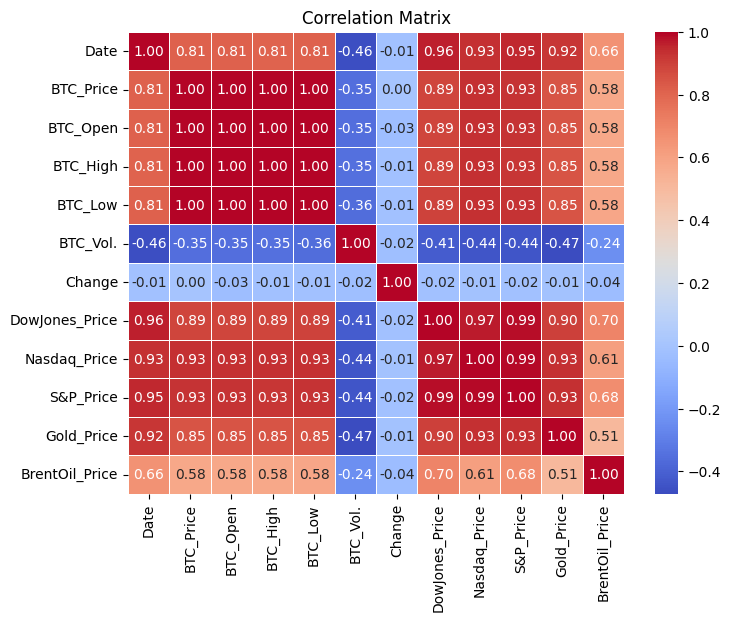

In [97]:
# Calculate the correlation matrix
correlation_matrix = HE.corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Web Scraping

# DO NOT RUN CODE ( IT WILL TAKE LONG TIME) around 3 hours

# Base URL of the cryptocurrency news page
base_url = 'https://www.investing.com/news/cryptocurrency-news'

# Headers to simulate a browser visit
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.5938.132 Safari/537.36'
}

# Lists to store the data
all_times = []
all_titles = []

# Loop through the page range (from page 20 to 100)
for page_num in range(14,2700):  # Adjust range as needed
    # Construct the URL for the current page
    if page_num == 1:
        url = base_url  # The first page does not have a page number in the URL
    else:
        url = f"{base_url}/{page_num}"

    # Send the request
    response = requests.get(url, headers=headers)

    # Check if the request was successful
    if response.status_code == 200:
        print(f"Successfully accessed page {page_num}")

        # Parse the HTML content
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find all time and title elements
        times = soup.find_all('time', {'data-test': 'article-publish-date'})
        titles = soup.find_all('a', {'data-test': 'article-title-link'})

        # Extract text and store in lists
        all_times.extend([time.get_text() for time in times])
        all_titles.extend([title.get_text() for title in titles])

    else:
        print(f"Failed to access page {page_num}")

# Create a DataFrame with the collected data
crypto_news = pd.DataFrame({
    'Time': all_times,
    'Title': all_titles
})

# Display the table
print(crypto_news)

In [98]:
crypto_news = pd.read_excel("/content/drive/MyDrive/dataset/crypto_news.xlsx")

In [99]:
crypto_news

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Date,Title
0,"Sep 30, 2024",Impossible Cloud Network Launches ICNT: The To...
1,"Sep 30, 2024",Former Binance CEO Speaks out After Prison Rel...
2,"Sep 30, 2024",De.Fi World 2024 Set to Convene Industry Leade...
3,"Sep 30, 2024","Bitcoin Bull Michael Saylor Flexes 1,325% Gain..."
4,"Sep 30, 2024",World Mobile Launches on Base to Expand Global...
...,...,...
93864,"May 14, 2018",Odyssey (OCN) Falls After Extraordinary Rally...
93865,"May 14, 2018",Thailand: Legal Framework For Cryptocurrencies...
93866,"May 14, 2018",CME Group in deal to offer ether reference rate
93867,"May 14, 2018","EXCLUSIVE: Q&A with Loi Luu, Founder & CEO of..."


## Sentiment Analysis

In [100]:
Sentiment_analysis = pd.read_excel("/content/drive/MyDrive/dataset/Sentiment_analysis.xlsx")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [101]:
Sentiment_analysis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Date,Weighted_Average_Sentiment,Most_Influential_Sentiment,Majority_Sentiment
0,2019-04-01,-0.175181,Negative,Negative
1,2020-04-01,-0.093845,Positive,Negative
2,2021-04-01,0.014948,Positive,Positive
3,2022-04-01,-0.019067,Negative,Positive
4,2023-04-01,-0.111306,Positive,Negative
...,...,...,...,...
2309,2020-09-30,-0.154819,Negative,Negative
2310,2021-09-30,-0.003709,Positive,Negative
2311,2022-09-30,-0.056700,Negative,Negative
2312,2023-09-30,-0.139296,Negative,Negative


In [135]:
Sentiment_analysis['Date'] = pd.to_datetime(Sentiment_analysis['Date'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [102]:
# check
print((Sentiment_analysis['Most_Influential_Sentiment']== 'Negative').sum())
print((Sentiment_analysis['Most_Influential_Sentiment']== 'Positive').sum())
print((Sentiment_analysis['Most_Influential_Sentiment']== 'Neutral').sum())

Sentiment_analysis['Most_Influential_Sentiment'].isnull().sum()


1280
1034
0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0

In [103]:
#check
print((Sentiment_analysis['Majority_Sentiment']== 'Negative').sum())
print((Sentiment_analysis['Majority_Sentiment']== 'Positive').sum())
print((Sentiment_analysis['Majority_Sentiment']== 'Neutral').sum())

Sentiment_analysis['Majority_Sentiment'].isnull().sum()

1421
882
11


0

In [169]:
# Merge the datasets on the 'Date' column with 'inner' join
Dataset = pd.merge(HE , Sentiment_analysis, on='Date', how='inner')

# Reorder columns
sentiment_columns = ['Weighted_Average_Sentiment', 'Most_Influential_Sentiment', 'Majority_Sentiment']
remaining_columns = [col for col in Dataset.columns if col not in sentiment_columns]

Dataset = Dataset[remaining_columns + sentiment_columns]

# Display the resulting DataFrame
Dataset

,Date,BTC_Price,BTC_Open,BTC_High,BTC_Low,BTC_Vol.,Change,DowJones_Price,Nasdaq_Price,S&P_Price,Gold_Price,BrentOil_Price,Weighted_Average_Sentiment,Most_Influential_Sentiment,Majority_Sentiment
0,2018-05-14,8670.8,8683.8,8882.4,8279.5,37150.0,-0.15,24899.41,7411.31,2730.10,1313.20,78.17,0.110124,Positive,Positive
1,2018-05-15,8467.5,8668.5,8838.0,8420.7,26210.0,-2.34,24706.41,7351.63,2711.40,1290.39,78.94,0.117673,Negative,Positive
2,2018-05-16,8336.1,8467.0,8488.7,8103.6,32760.0,-1.55,24768.93,7398.30,2722.50,1290.63,78.19,-0.044261,Negative,Negative
3,2018-05-17,8051.8,8349.7,8466.9,7986.8,25190.0,-3.41,24713.98,7382.47,2720.10,1290.73,80.09,0.007733,Positive,Positive
4,2018-05-18,8239.0,8054.8,8276.6,7927.8,23440.0,2.32,24715.09,7354.34,2713.00,1291.30,78.38,0.022261,Negative,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2306,2024-09-26,65307.0,63264.0,65856.0,62805.0,860.0,3.23,42175.11,18190.29,5745.37,2694.90,73.06,0.020917,Negative,Positive
2307,2024-09-27,65928.0,65307.0,66548.0,64987.0,670.0,0.95,42313.00,18119.59,5738.17,2644.30,71.63,-0.120266,Negative,Negative
2308,2024-09-28,66015.0,65928.0,66410.0,65568.0,110.0,0.13,42313.00,18119.59,5738.17,2644.30,71.63,-0.174357,Negative,Negative
2309,2024-09-29,65762.0,66015.0,66193.0,65574.0,90.0,-0.38,42313.00,18119.59,5738.17,2644.30,71.63,0.447328,Positive,Positive


# Modling

In [170]:
from sklearn.preprocessing import LabelEncoder

#Encode the sentiment columns into numeric values
label_encoder = LabelEncoder()
Dataset['Most_Influential_Sentiment'] = label_encoder.fit_transform(Dataset['Most_Influential_Sentiment'])
Dataset['Majority_Sentiment'] = label_encoder.fit_transform(Dataset['Majority_Sentiment'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [171]:
Dataset

,Date,BTC_Price,BTC_Open,BTC_High,BTC_Low,BTC_Vol.,Change,DowJones_Price,Nasdaq_Price,S&P_Price,Gold_Price,BrentOil_Price,Weighted_Average_Sentiment,Most_Influential_Sentiment,Majority_Sentiment
0,2018-05-14,8670.8,8683.8,8882.4,8279.5,37150.0,-0.15,24899.41,7411.31,2730.10,1313.20,78.17,0.110124,1,2
1,2018-05-15,8467.5,8668.5,8838.0,8420.7,26210.0,-2.34,24706.41,7351.63,2711.40,1290.39,78.94,0.117673,0,2
2,2018-05-16,8336.1,8467.0,8488.7,8103.6,32760.0,-1.55,24768.93,7398.30,2722.50,1290.63,78.19,-0.044261,0,0
3,2018-05-17,8051.8,8349.7,8466.9,7986.8,25190.0,-3.41,24713.98,7382.47,2720.10,1290.73,80.09,0.007733,1,2
4,2018-05-18,8239.0,8054.8,8276.6,7927.8,23440.0,2.32,24715.09,7354.34,2713.00,1291.30,78.38,0.022261,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2306,2024-09-26,65307.0,63264.0,65856.0,62805.0,860.0,3.23,42175.11,18190.29,5745.37,2694.90,73.06,0.020917,0,2
2307,2024-09-27,65928.0,65307.0,66548.0,64987.0,670.0,0.95,42313.00,18119.59,5738.17,2644.30,71.63,-0.120266,0,0
2308,2024-09-28,66015.0,65928.0,66410.0,65568.0,110.0,0.13,42313.00,18119.59,5738.17,2644.30,71.63,-0.174357,0,0
2309,2024-09-29,65762.0,66015.0,66193.0,65574.0,90.0,-0.38,42313.00,18119.59,5738.17,2644.30,71.63,0.447328,1,2


#  LSTM MODEL

Training set size: (1145, 20, 1)
Validation set size: (458, 20, 1)
Testing set size: (688, 20, 1)
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0319 - mae: 0.1012 - val_loss: 0.0023 - val_mae: 0.0361
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 9.3160e-04 - mae: 0.0185 - val_loss: 0.0018 - val_mae: 0.0319
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0012 - mae: 0.0183 - val_loss: 0.0018 - val_mae: 0.0315
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0011 - mae: 0.0187 - val_loss: 0.0022 - val_mae: 0.0368
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0011 - mae: 0.0181 - val_loss: 0.0031 - val_mae: 0.0457
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 8.2525e-04 - mae: 0.0165 - val_loss: 0.0016 - val_mae: 0.0295
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 7.5086e-04 - mae: 0.0146 - val_loss: 0.0017 - val_mae: 0.0300
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0011 - mae: 0.0191 - val_loss: 0.0015 - val_mae: 0.0291
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 8.38

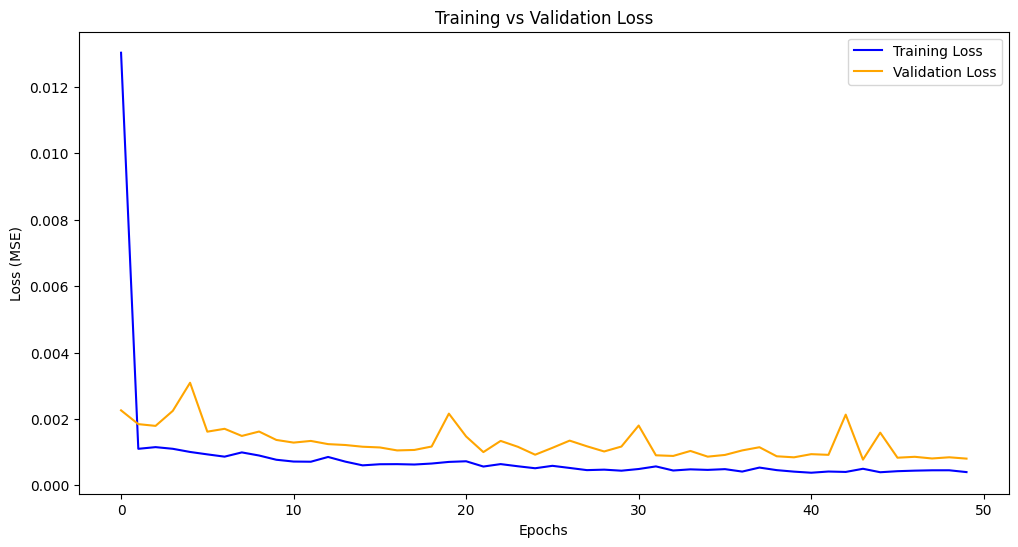

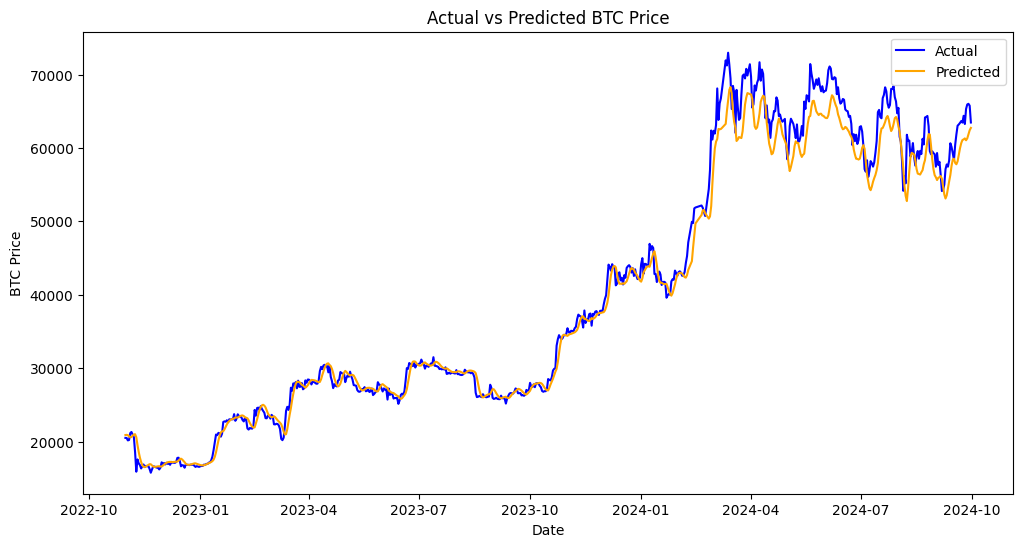

In [128]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

data = Dataset.copy()
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Scaling the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['BTC_Price']])  # Scale only the target column
time_steps = 20  # Number of time steps for sequences

# Function to create sequences
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])  # Collect time_steps of data
        y.append(data[i + time_steps])   # Target is the next value after the sequence
    return np.array(X), np.array(y)

# Create sequences
X, y = create_sequences(data_scaled, time_steps)

# Splitting the data into training, validation, and testing sets
train_size = int(len(X) * 0.5)  # 50% training
val_size = int(len(X) * 0.2)    # 20% validation
test_size = len(X) - train_size - val_size  # Remaining 30% for testing

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size + val_size], y[train_size:train_size + val_size]
X_test, y_test = X[train_size + val_size:], y[train_size + val_size:]

print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")
print(f"Testing set size: {X_test.shape}")

#  Build the LSTM Model
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=input_shape),
        Dropout(0.3),
        LSTM(32, return_sequences=False),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

input_shape = (X_train.shape[1], X_train.shape[2])
lstm_model = build_lstm_model(input_shape)

# Train the Model
history = lstm_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)

#  Evaluate the Model
train_predictions = lstm_model.predict(X_train)
val_predictions = lstm_model.predict(X_val)
test_predictions = lstm_model.predict(X_test)

# Rescale data back to original scale
y_train_original = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
train_predictions_original = scaler.inverse_transform(train_predictions).flatten()

y_val_original = scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()
val_predictions_original = scaler.inverse_transform(val_predictions).flatten()

y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
test_predictions_original = scaler.inverse_transform(test_predictions).flatten()

# Calculate metrics
train_mae = mean_absolute_error(y_train_original, train_predictions_original)
val_mae = mean_absolute_error(y_val_original, val_predictions_original)
test_mae = mean_absolute_error(y_test_original, test_predictions_original)

print(f"Training MAE: {train_mae:.2f}")
print(f"Validation MAE: {val_mae:.2f}")
print(f"Testing MAE: {test_mae:.2f}")

# Step 7: Generalization Gap
train_mape = (train_mae / np.mean(y_train_original)) * 100
val_mape = (val_mae / np.mean(y_val_original)) * 100
test_mape = (test_mae / np.mean(y_test_original)) * 100

# Calculate Generalization Gap
generalization_gap_mae = abs(train_mae - test_mae)
generalization_gap_mape = abs(train_mape - test_mape)


# Calculate percentages for MAE
train_mae_percentage = (train_mae / np.mean(y_train_original)) * 100
val_mae_percentage = (val_mae / np.mean(y_val_original)) * 100
test_mae_percentage = (test_mae / np.mean(y_test_original)) * 100

# Print metrics
print(f"Training MAPE: {train_mape:.2f}%")
print(f"Validation MAPE: {val_mape:.2f}%")
print(f"Testing MAPE: {test_mape:.2f}%")
print(f"Training MAE: {train_mae:.2f}, Training MAE %: {train_mape:.2f}%")
print(f"Validation MAE: {val_mae:.2f}, Validation MAE %: {val_mape:.2f}%")
print(f"Testing MAE: {test_mae:.2f}, Testing MAE %: {test_mape:.2f}%")
print(f"Generalization Gap (MAE): {abs(train_mae - test_mae):.2f}")
print(f"Generalization Gap (MAPE): {abs(train_mape - test_mape):.2f}%")

# Step 5: Plot Training vs Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()


# Extract dates for the testing set
test_dates = data.index[-len(y_test_original):]  # Adjust range based on the length of the test set

plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_test_original, label="Actual", color='blue')
plt.plot(test_dates, test_predictions_original, label="Predicted", color='orange')
plt.title("Actual vs Predicted BTC Price")
plt.xlabel("Date")  # Label updated to reflect the x-axis
plt.ylabel("BTC Price")
plt.legend()
plt.show()





# BiLSTM MODEL

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - loss: 0.0104 - mae: 0.0656 - val_loss: 0.0035 - val_mae: 0.0416
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0015 - mae: 0.0245 - val_loss: 0.0026 - val_mae: 0.0401
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0014 - mae: 0.0197 - val_loss: 0.0023 - val_mae: 0.0383
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 9.6430e-04 - mae: 0.0174 - val_loss: 0.0020 - val_mae: 0.0357
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 8.4166e-04 - mae: 0.0163 - val_loss: 0.0020 - val_mae: 0.0370
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 8.1153e-04 - mae: 0.0162 - val_loss: 0.0016 - val_mae: 0.0318
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 8.3214e-04 - mae: 0.0162 - val_loss: 0.0013 - val_mae: 0.0264
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 5.9815e-04 - mae: 0.0142 - val_loss: 0.0011 - val_mae: 0.0263
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - l

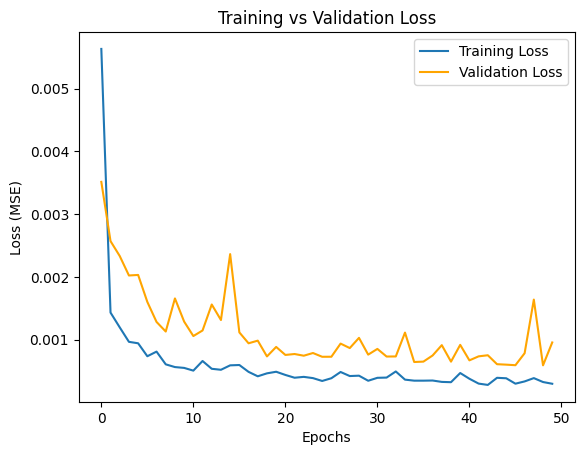

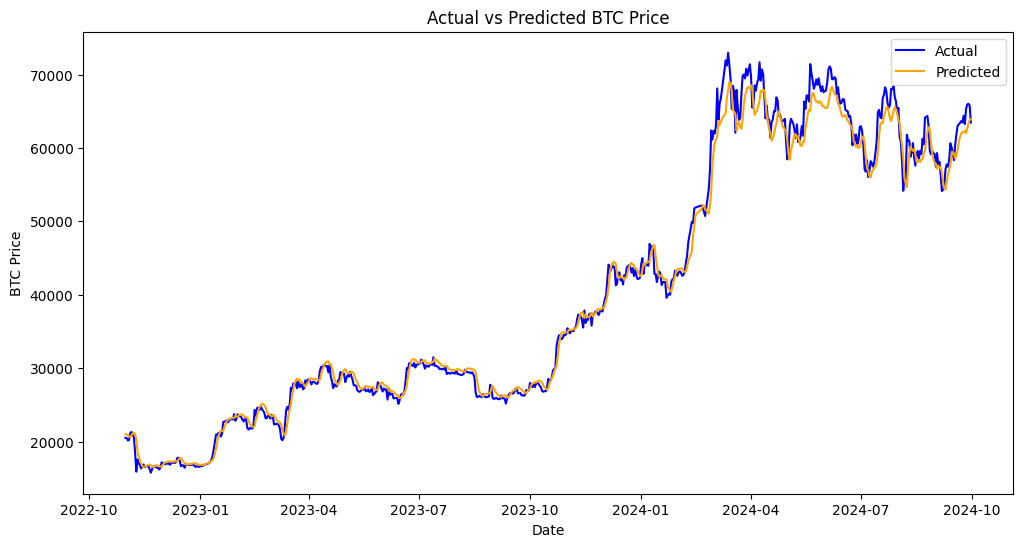

In [172]:

 # Importing required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf

data = Dataset.copy()
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['BTC_Price']])  # Scaling only the 'BTC_Price'
data_scaled = pd.DataFrame(data_scaled, index=data.index, columns=['BTC_Price'])  # Retain the original index

time_steps = 20  # Number of time steps for sequences

# Function to create sequences
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data.iloc[i:i + time_steps].values)
        y.append(data.iloc[i + time_steps].values)
    return np.array(X), np.array(y)

# Create sequences and split into train, validation, and test sets
X, y = create_sequences(data_scaled, time_steps)

# Split data into training (50%), validation (20%), and testing (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42, shuffle=False)

#  Build BiLSTM Model
def build_bilstm_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True), input_shape=input_shape),
        tf.keras.layers.Dropout(0.3),  # Added dropout for regularization
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=False)),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mse", metrics=["mae"])
    return model

input_shape = (X_train.shape[1], X_train.shape[2])
bilstm_model = build_bilstm_model(input_shape)

# Train the BiLSTM Model
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

history = bilstm_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the Model
train_predictions = bilstm_model.predict(X_train)
val_predictions = bilstm_model.predict(X_val)
test_predictions = bilstm_model.predict(X_test)

# Rescale data back to original scale
y_train_original = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
train_predictions_original = scaler.inverse_transform(train_predictions.reshape(-1, 1)).flatten()

y_val_original = scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()
val_predictions_original = scaler.inverse_transform(val_predictions.reshape(-1, 1)).flatten()

y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
test_predictions_original = scaler.inverse_transform(test_predictions.reshape(-1, 1)).flatten()

# Calculate metrics
train_mse = mean_squared_error(y_train_original, train_predictions_original)
train_mae = mean_absolute_error(y_train_original, train_predictions_original)
train_mape = np.mean(np.abs((y_train_original - train_predictions_original) / y_train_original)) * 100

val_mse = mean_squared_error(y_val_original, val_predictions_original)
val_mae = mean_absolute_error(y_val_original, val_predictions_original)
val_mape = np.mean(np.abs((y_val_original - val_predictions_original) / y_val_original)) * 100

test_mse = mean_squared_error(y_test_original, test_predictions_original)
test_mae = mean_absolute_error(y_test_original, test_predictions_original)
test_mape = np.mean(np.abs((y_test_original - test_predictions_original) / y_test_original)) * 100

# Print metrics
print(f"Training MAPE: {train_mape:.2f}%")
print(f"Validation MAPE: {val_mape:.2f}%")
print(f"Testing MAPE: {test_mape:.2f}%")
print(f"Training MAE: {train_mae:.2f}, Training MAE %: {train_mape:.2f}%")
print(f"Validation MAE: {val_mae:.2f}, Validation MAE %: {val_mape:.2f}%")
print(f"Testing MAE: {test_mae:.2f}, Testing MAE %: {test_mape:.2f}%")
print(f"Generalization Gap (MAE): {abs(train_mae - test_mae):.2f}")
print(f"Generalization Gap (MAPE): {abs(train_mape - test_mape):.2f}%")

#  Plot Training vs Validation Loss
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss", color='orange')
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()


test_dates = data.index[-len(y_test_original):]  # Adjust range based on the length of the test set

plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_test_original, label="Actual", color='blue')
plt.plot(test_dates, test_predictions_original, label="Predicted", color='orange')
plt.title("Actual vs Predicted BTC Price")
plt.xlabel("Date")  # Label updated to reflect the x-axis
plt.ylabel("BTC Price")
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - loss: 0.0256 - mae: 0.0974 - val_loss: 0.0018 - val_mae: 0.0331
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0022 - mae: 0.0249 - val_loss: 0.0014 - val_mae: 0.0283
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0013 - mae: 0.0198 - val_loss: 0.0015 - val_mae: 0.0278
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0010 - mae: 0.0170 - val_loss: 0.0016 - val_mae: 0.0289
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0011 - mae: 0.0178 - val_loss: 0.0018 - val_mae: 0.0315
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0010 - mae: 0.0178 - val_loss: 0.0014 - val_mae: 0.0278
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0010 - mae: 0.0170 - val_loss: 0.0020 - val_mae: 0.0327
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 8.5492e-04 - mae: 0.0161 - val_loss: 0.0014 - val_mae: 0.0278
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 7.9022e-04 -

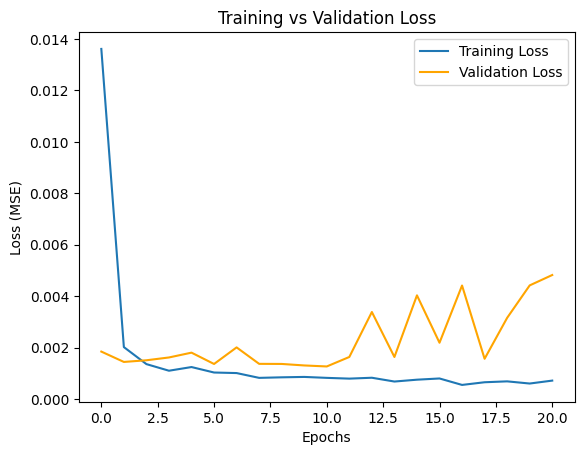

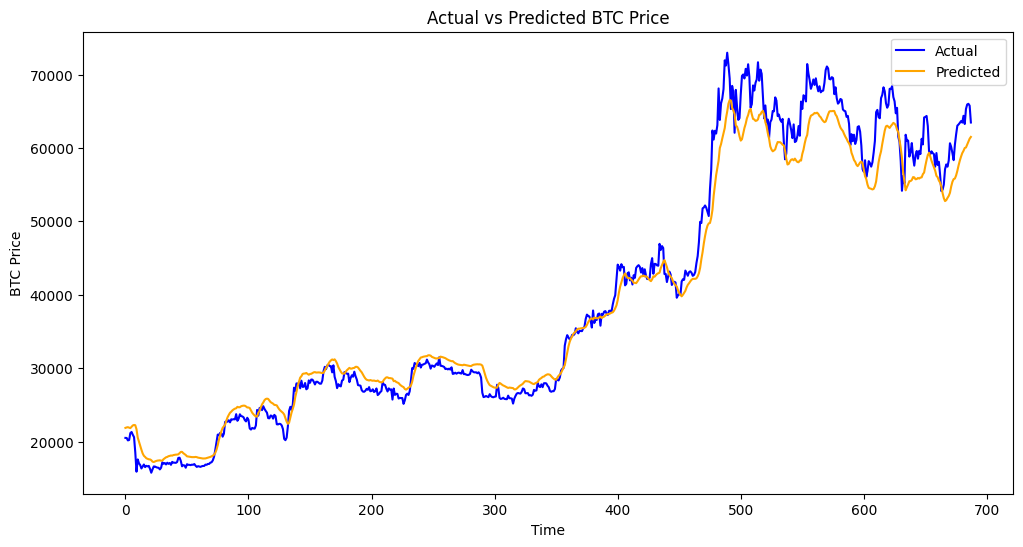

In [125]:
# Importing required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf


data = Dataset.copy()
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['BTC_Price']])  # Scaling only the 'BTC_Price'
data_scaled = pd.DataFrame(data_scaled, index=data.index, columns=['BTC_Price'])  # Retain the original index

time_steps = 20  # Number of time steps for sequences

# Function to create sequences
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data.iloc[i:i + time_steps].values)
        y.append(data.iloc[i + time_steps].values)
    return np.array(X), np.array(y)

# Create sequences and split into train, validation, and test sets
X, y = create_sequences(data_scaled, time_steps)

# Split data into training (50%), validation (20%), and testing (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42, shuffle=False)

# Build Hybrid LSTM + Dense Model
def build_hybrid_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(64, return_sequences=False, input_shape=input_shape),
        tf.keras.layers.Dropout(0.3),  # Added dropout for regularization
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mse", metrics=["mae"])
    return model

input_shape = (X_train.shape[1], X_train.shape[2])
hybrid_model = build_hybrid_model(input_shape)

# Step 3: Train the Hybrid Model
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

history = hybrid_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

#  Evaluate the Model
train_predictions = hybrid_model.predict(X_train)
val_predictions = hybrid_model.predict(X_val)
test_predictions = hybrid_model.predict(X_test)

# Rescale data back to original scale
y_train_original = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
train_predictions_original = scaler.inverse_transform(train_predictions.reshape(-1, 1)).flatten()

y_val_original = scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()
val_predictions_original = scaler.inverse_transform(val_predictions.reshape(-1, 1)).flatten()

y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
test_predictions_original = scaler.inverse_transform(test_predictions.reshape(-1, 1)).flatten()

# Calculate metrics
train_mse = mean_squared_error(y_train_original, train_predictions_original)
train_mae = mean_absolute_error(y_train_original, train_predictions_original)
train_mape = np.mean(np.abs((y_train_original - train_predictions_original) / y_train_original)) * 100

val_mse = mean_squared_error(y_val_original, val_predictions_original)
val_mae = mean_absolute_error(y_val_original, val_predictions_original)
val_mape = np.mean(np.abs((y_val_original - val_predictions_original) / y_val_original)) * 100

test_mse = mean_squared_error(y_test_original, test_predictions_original)
test_mae = mean_absolute_error(y_test_original, test_predictions_original)
test_mape = np.mean(np.abs((y_test_original - test_predictions_original) / y_test_original)) * 100

# Print metrics
print(f"Training MAPE: {train_mape:.2f}%")
print(f"Validation MAPE: {val_mape:.2f}%")
print(f"Testing MAPE: {test_mape:.2f}%")
print(f"Training MAE: {train_mae:.2f}, Training MAE %: {train_mape:.2f}%")
print(f"Validation MAE: {val_mae:.2f}, Validation MAE %: {val_mape:.2f}%")
print(f"Testing MAE: {test_mae:.2f}, Testing MAE %: {test_mape:.2f}%")
print(f"Generalization Gap (MAE): {abs(train_mae - test_mae):.2f}")
print(f"Generalization Gap (MAPE): {abs(train_mape - test_mape):.2f}%")

#Plot Training vs Validation Loss
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss", color='orange')
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()

# Plot Predicted vs Actual Data (Testing Set)
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label="Actual", color='blue')
plt.plot(test_predictions_original, label="Predicted", color='orange')
plt.title("Actual vs Predicted BTC Price")
plt.xlabel("Time")
plt.ylabel("BTC Price")
plt.legend()
plt.show()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0325 - mae: 0.1040 - val_loss: 0.0028 - val_mae: 0.0429
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0031 - mae: 0.0361 - val_loss: 0.0023 - val_mae: 0.0370
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0021 - mae: 0.0242 - val_loss: 0.0029 - val_mae: 0.0385
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0014 - mae: 0.0198 - val_loss: 0.0020 - val_mae: 0.0328
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0016 - mae: 0.0209 - val_loss: 0.0020 - val_mae: 0.0347
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0015 - mae: 0.0211 - val_loss: 0.0023 - val_mae: 0.0339
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0012 - mae: 0.0190 - val_loss: 0.0020 - val_mae: 0.0368
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0012 - mae: 0.0202 - val_loss: 0.0018 - val_mae: 0.0339
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.001

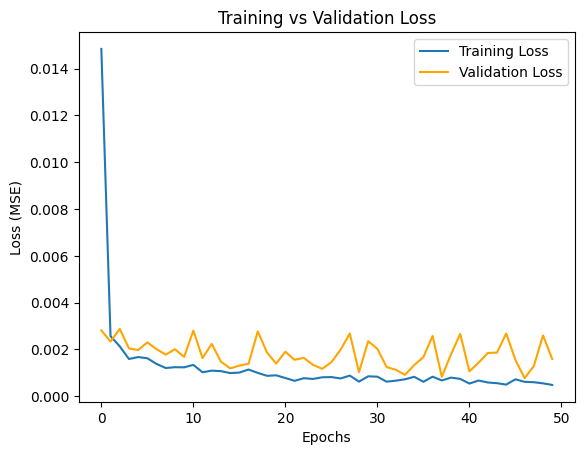

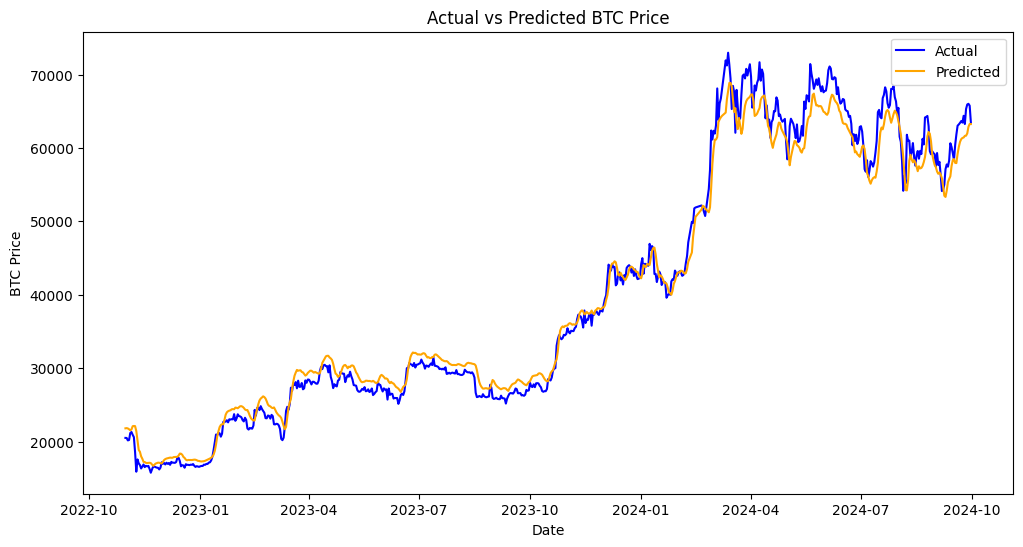

In [129]:
# Importing required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf


data = Dataset.copy()
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['BTC_Price']])  # Scaling only the 'BTC_Price'
data_scaled = pd.DataFrame(data_scaled, index=data.index, columns=['BTC_Price'])  # Retain the original index

time_steps = 20  # Number of time steps for sequences

# Function to create sequences
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data.iloc[i:i + time_steps].values)
        y.append(data.iloc[i + time_steps].values)
    return np.array(X), np.array(y)

# Create sequences and split into train, validation, and test sets
X, y = create_sequences(data_scaled, time_steps)

# Split data into training (50%), validation (20%), and testing (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42, shuffle=False)

# Step 2: Build Hybrid LSTM + CNN Model
def build_hybrid_model(input_shape):
    model = tf.keras.Sequential([
        # CNN Layers
        tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling1D(pool_size=2),

        # LSTM Layer
        tf.keras.layers.LSTM(64, return_sequences=False),
        tf.keras.layers.Dropout(0.3),  # Regularization

        # Fully Connected Dense Layers
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)  # Final output layer
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mse", metrics=["mae"])
    return model

input_shape = (X_train.shape[1], X_train.shape[2])
hybrid_model = build_hybrid_model(input_shape)

# Step 3: Train the Hybrid Model
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

history = hybrid_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Step 4: Evaluate the Model
train_predictions = hybrid_model.predict(X_train)
val_predictions = hybrid_model.predict(X_val)
test_predictions = hybrid_model.predict(X_test)

# Rescale data back to original scale
y_train_original = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
train_predictions_original = scaler.inverse_transform(train_predictions.reshape(-1, 1)).flatten()

y_val_original = scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()
val_predictions_original = scaler.inverse_transform(val_predictions.reshape(-1, 1)).flatten()

y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
test_predictions_original = scaler.inverse_transform(test_predictions.reshape(-1, 1)).flatten()

# Calculate metrics
train_mse = mean_squared_error(y_train_original, train_predictions_original)
train_mae = mean_absolute_error(y_train_original, train_predictions_original)
train_mape = np.mean(np.abs((y_train_original - train_predictions_original) / y_train_original)) * 100

val_mse = mean_squared_error(y_val_original, val_predictions_original)
val_mae = mean_absolute_error(y_val_original, val_predictions_original)
val_mape = np.mean(np.abs((y_val_original - val_predictions_original) / y_val_original)) * 100

test_mse = mean_squared_error(y_test_original, test_predictions_original)
test_mae = mean_absolute_error(y_test_original, test_predictions_original)
test_mape = np.mean(np.abs((y_test_original - test_predictions_original) / y_test_original)) * 100

# Print metrics
print(f"Training MAPE: {train_mape:.2f}%")
print(f"Validation MAPE: {val_mape:.2f}%")
print(f"Testing MAPE: {test_mape:.2f}%")
print(f"Training MAE: {train_mae:.2f}, Training MAE %: {train_mape:.2f}%")
print(f"Validation MAE: {val_mae:.2f}, Validation MAE %: {val_mape:.2f}%")
print(f"Testing MAE: {test_mae:.2f}, Testing MAE %: {test_mape:.2f}%")
print(f"Generalization Gap (MAE): {abs(train_mae - test_mae):.2f}")
print(f"Generalization Gap (MAPE): {abs(train_mape - test_mape):.2f}%")

#  Plot Training vs Validation Loss
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss", color='orange')
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()


test_dates = data.index[-len(y_test_original):]

plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_test_original, label="Actual", color='blue')
plt.plot(test_dates, test_predictions_original, label="Predicted", color='orange')
plt.title("Actual vs Predicted BTC Price")
plt.xlabel("Date")  # Label updated to reflect the x-axis
plt.ylabel("BTC Price")
plt.legend()
plt.show()



# Hybrid LSTM + CNN Model

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0371 - mae: 0.1100 - val_loss: 0.0031 - val_mae: 0.0429
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0024 - mae: 0.0285 - val_loss: 0.0021 - val_mae: 0.0350
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0020 - mae: 0.0234 - val_loss: 0.0023 - val_mae: 0.0388
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0018 - mae: 0.0235 - val_loss: 0.0019 - val_mae: 0.0339
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0014 - mae: 0.0212 - val_loss: 0.0030 - val_mae: 0.0387
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0015 - mae: 0.0206 - val_loss: 0.0018 - val_mae: 0.0330
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0014 - mae: 0.0217 - val_loss: 0.0028 - val_mae: 0.0378
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0016 - mae: 0.0226 - val_loss: 0.0020 - val_mae: 0.0352
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0014 - mae: 0.

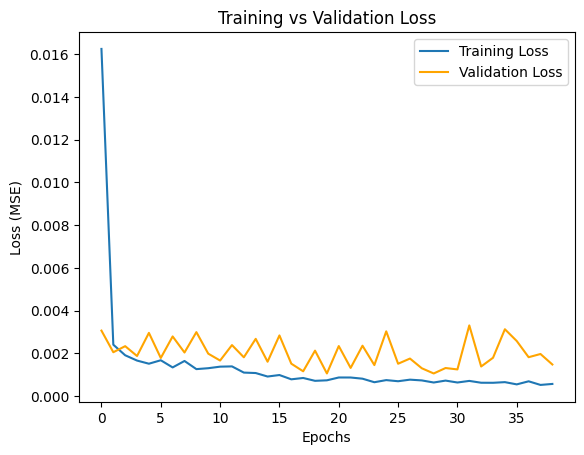

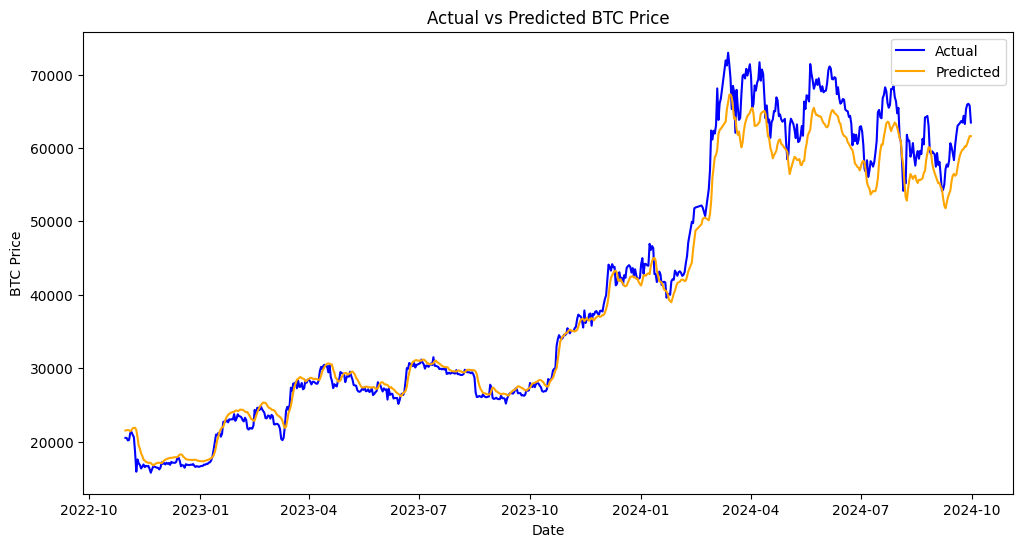

In [134]:
# Importing required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf

data = Dataset.copy()
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['BTC_Price']])  # Scaling only the 'BTC_Price'
data_scaled = pd.DataFrame(data_scaled, index=data.index, columns=['BTC_Price'])  # Retain the original index

time_steps = 20  # Number of time steps for sequences

# Function to create sequences
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data.iloc[i:i + time_steps].values)
        y.append(data.iloc[i + time_steps].values)
    return np.array(X), np.array(y)

# Create sequences and split into train, validation, and test sets
X, y = create_sequences(data_scaled, time_steps)

# Split data into training (50%), validation (20%), and testing (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42, shuffle=False)

# Build Hybrid LSTM + CNN Model
def build_hybrid_model(input_shape):
    model = tf.keras.Sequential([
        # CNN Layers
        tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling1D(pool_size=2),

        # LSTM Layer
        tf.keras.layers.LSTM(64, return_sequences=False),
        tf.keras.layers.Dropout(0.3),  # Regularization

        # Fully Connected Dense Layers
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)  # Final output layer
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mse", metrics=["mae"])
    return model

input_shape = (X_train.shape[1], X_train.shape[2])
hybrid_model = build_hybrid_model(input_shape)

# Step 3: Train the Hybrid Model
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

history = hybrid_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)


train_predictions = hybrid_model.predict(X_train)
val_predictions = hybrid_model.predict(X_val)
test_predictions = hybrid_model.predict(X_test)

# Rescale data back to original scale
y_train_original = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
train_predictions_original = scaler.inverse_transform(train_predictions.reshape(-1, 1)).flatten()

y_val_original = scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()
val_predictions_original = scaler.inverse_transform(val_predictions.reshape(-1, 1)).flatten()

y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
test_predictions_original = scaler.inverse_transform(test_predictions.reshape(-1, 1)).flatten()

# Calculate metrics
train_mse = mean_squared_error(y_train_original, train_predictions_original)
train_mae = mean_absolute_error(y_train_original, train_predictions_original)
train_mape = np.mean(np.abs((y_train_original - train_predictions_original) / y_train_original)) * 100

val_mse = mean_squared_error(y_val_original, val_predictions_original)
val_mae = mean_absolute_error(y_val_original, val_predictions_original)
val_mape = np.mean(np.abs((y_val_original - val_predictions_original) / y_val_original)) * 100

test_mse = mean_squared_error(y_test_original, test_predictions_original)
test_mae = mean_absolute_error(y_test_original, test_predictions_original)
test_mape = np.mean(np.abs((y_test_original - test_predictions_original) / y_test_original)) * 100

# Print metrics
print(f"Training MAPE: {train_mape:.2f}%")
print(f"Validation MAPE: {val_mape:.2f}%")
print(f"Testing MAPE: {test_mape:.2f}%")
print(f"Training MAE: {train_mae:.2f}, Training MAE %: {train_mape:.2f}%")
print(f"Validation MAE: {val_mae:.2f}, Validation MAE %: {val_mape:.2f}%")
print(f"Testing MAE: {test_mae:.2f}, Testing MAE %: {test_mape:.2f}%")
print(f"Generalization Gap (MAE): {abs(train_mae - test_mae):.2f}")
print(f"Generalization Gap (MAPE): {abs(train_mape - test_mape):.2f}%")

#  Plot Training vs Validation Loss
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss", color='orange')
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()

test_dates = data.index[-len(y_test_original):]  # Adjust range based on the length of the test set

plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_test_original, label="Actual", color='blue')
plt.plot(test_dates, test_predictions_original, label="Predicted", color='orange')
plt.title("Actual vs Predicted BTC Price")
plt.xlabel("Date")  # Label updated to reflect the x-axis
plt.ylabel("BTC Price")
plt.legend()
plt.show()



# BiLSTM + CNN Hybrid Model with layesr 64

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - loss: 0.0288 - mae: 0.1022 - val_loss: 0.0081 - val_mae: 0.0777
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0040 - mae: 0.0416 - val_loss: 0.0029 - val_mae: 0.0407
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0030 - mae: 0.0270 - val_loss: 0.0028 - val_mae: 0.0395
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0021 - mae: 0.0235 - val_loss: 0.0036 - val_mae: 0.0475
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0028 - mae: 0.0260 - val_loss: 0.0027 - val_mae: 0.0395
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0020 - mae: 0.0234 - val_loss: 0.0027 - val_mae: 0.0407
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0020 - mae: 0.0234 - val_loss: 0.0030 - val_mae: 0.0390
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0021 - mae: 0.0254 - val_loss: 0.0025 - val_mae: 0.0395
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.00

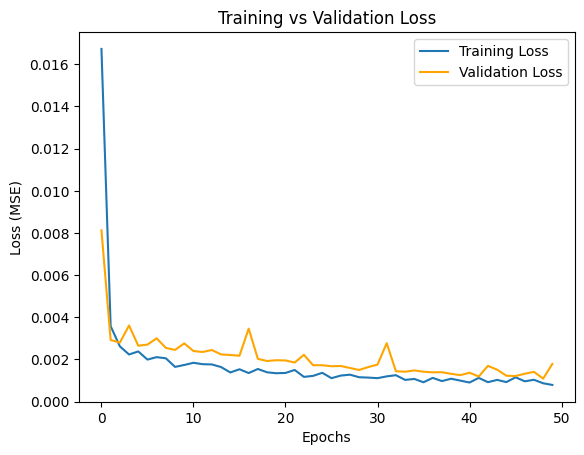

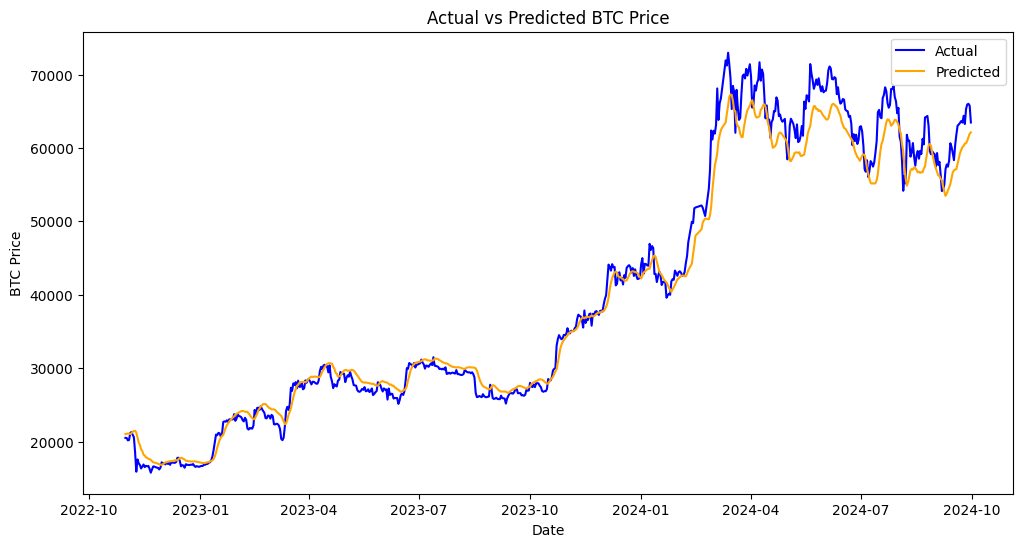

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Conv1D, MaxPooling1D, Flatten, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

data = Dataset.copy()
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['BTC_Price']])  # Scale BTC Price

time_steps = 20

def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

X, y = create_sequences(data_scaled, time_steps)

# Split data into train, validation, and test sets
train_size = int(len(X) * 0.5)
val_size = int(len(X) * 0.2)
test_size = len(X) - train_size - val_size

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]

# Build BiLSTM + CNN Hybrid Model with Modified Hyperparameters
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))

# CNN layers with updated filters
cnn = Conv1D(filters=128, kernel_size=3, activation='relu')(input_layer)
cnn = MaxPooling1D(pool_size=2)(cnn)

# BiLSTM layer with increased units
lstm = Bidirectional(LSTM(64))(cnn)
dropout = Dropout(0.4)(lstm)  # Increased dropout

# Output layer
output_layer = Dense(1)(dropout)

# Define the model
hybrid_model = Model(inputs=input_layer, outputs=output_layer)
hybrid_model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse', metrics=['mae'])  # Reduced learning rate

# Step 3: Train the Hybrid Model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = hybrid_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=64,  # Increased batch size
    callbacks=[early_stopping],
    verbose=1
)

#  Evaluate the Model
train_predictions = hybrid_model.predict(X_train)
val_predictions = hybrid_model.predict(X_val)
test_predictions = hybrid_model.predict(X_test)

# Rescale predictions back to original scale
y_train_original = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
train_predictions_original = scaler.inverse_transform(train_predictions).flatten()

y_val_original = scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()
val_predictions_original = scaler.inverse_transform(val_predictions).flatten()

y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
test_predictions_original = scaler.inverse_transform(test_predictions).flatten()

# Calculate metrics
train_mae = mean_absolute_error(y_train_original, train_predictions_original)
train_mae_percent = (train_mae / np.mean(y_train_original)) * 100

val_mae = mean_absolute_error(y_val_original, val_predictions_original)
val_mae_percent = (val_mae / np.mean(y_val_original)) * 100

test_mae = mean_absolute_error(y_test_original, test_predictions_original)
test_mae_percent = (test_mae / np.mean(y_test_original)) * 100

generalization_gap_mae = abs(train_mae - test_mae)
generalization_gap_mape = abs(train_mae_percent - test_mae_percent)

# Print metrics
print(f"Training MAE: {train_mae:.2f}, Training MAE %: {train_mae_percent:.2f}%")
print(f"Validation MAE: {val_mae:.2f}, Validation MAE %: {val_mae_percent:.2f}%")
print(f"Testing MAE: {test_mae:.2f}, Testing MAE %: {test_mae_percent:.2f}%")
print(f"Generalization Gap (MAE): {generalization_gap_mae:.2f}")
print(f"Generalization Gap (MAPE): {generalization_gap_mape:.2f}%")

#  Plot Training vs Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()



# Extract dates for the testing set
test_dates = data.index[-len(y_test_original):]  # Adjust range based on the length of the test set

plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_test_original, label="Actual", color='blue')
plt.plot(test_dates, test_predictions_original, label="Predicted", color='orange')
plt.title("Actual vs Predicted BTC Price")
plt.xlabel("Date")  # Label updated to reflect the x-axis
plt.ylabel("BTC Price")
plt.legend()
plt.show()

# BiLSTM + CNN Hybrid Model with 128 layers

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0131 - mae: 0.0700 - val_loss: 0.0050 - val_mae: 0.0538
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0021 - mae: 0.0261 - val_loss: 0.0032 - val_mae: 0.0444
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0015 - mae: 0.0209 - val_loss: 0.0023 - val_mae: 0.0365
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0012 - mae: 0.0180 - val_loss: 0.0023 - val_mae: 0.0364
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0011 - mae: 0.0194 - val_loss: 0.0021 - val_mae: 0.0359
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0010 - mae: 0.0168 - val_loss: 0.0022 - val_mae: 0.0347
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0010 - mae: 0.0193 - val_loss: 0.0020 - val_mae: 0.0316
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0012 - mae: 0.0209 - val_loss: 0.0026 - val_mae: 0.0419
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.001

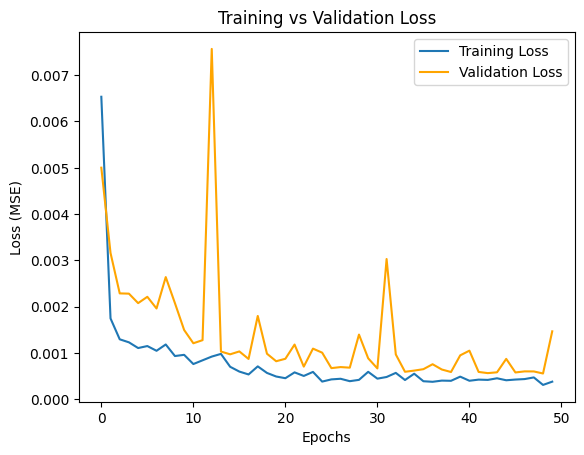

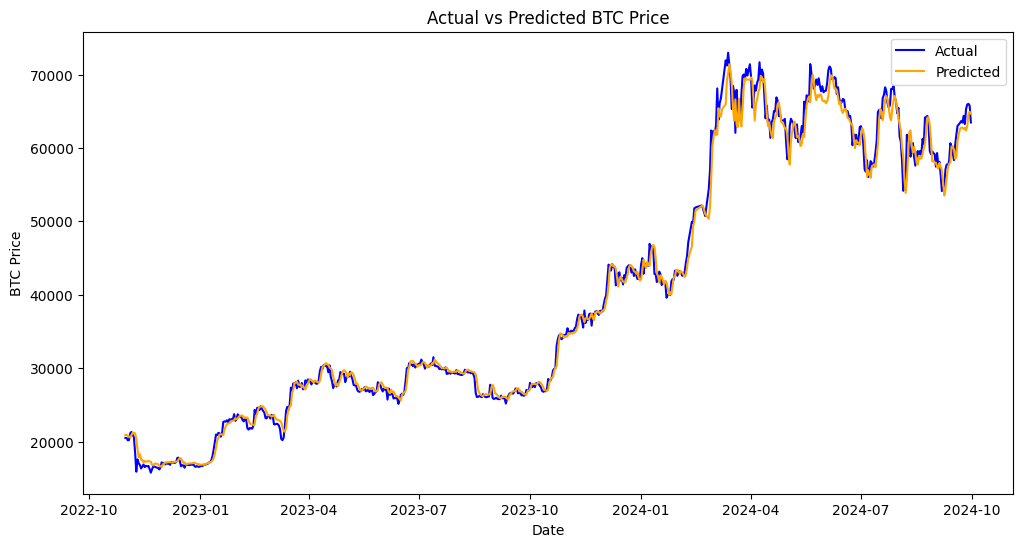

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Conv1D, MaxPooling1D, Flatten, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

#  Load and Process Data
data = Dataset.copy()
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['BTC_Price']])

time_steps = 20

def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

X, y = create_sequences(data_scaled, time_steps)

# Split data into train, validation, and test sets
train_size = int(len(X) * 0.5)
val_size = int(len(X) * 0.2)
test_size = len(X) - train_size - val_size

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]

# Build BiLSTM + CNN Hybrid Model
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))

# CNN layers
cnn = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
cnn = MaxPooling1D(pool_size=2)(cnn)

# Instead of flattening, connect the CNN output directly to the BiLSTM
lstm = Bidirectional(LSTM(128))(cnn)
dropout = Dropout(0.2)(lstm)

# Output layer
output_layer = Dense(1)(dropout)

# Define the model
hybrid_model = Model(inputs=input_layer, outputs=output_layer)
hybrid_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# rain the Hybrid Model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = hybrid_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

#  Evaluation
train_predictions = hybrid_model.predict(X_train)
val_predictions = hybrid_model.predict(X_val)
test_predictions = hybrid_model.predict(X_test)

# Rescale
y_train_original = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
train_predictions_original = scaler.inverse_transform(train_predictions).flatten()

y_val_original = scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()
val_predictions_original = scaler.inverse_transform(val_predictions).flatten()

y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
test_predictions_original = scaler.inverse_transform(test_predictions).flatten()

# Calculate metrics
train_mae = mean_absolute_error(y_train_original, train_predictions_original)
train_mae_percent = (train_mae / np.mean(y_train_original)) * 100

val_mae = mean_absolute_error(y_val_original, val_predictions_original)
val_mae_percent = (val_mae / np.mean(y_val_original)) * 100

test_mae = mean_absolute_error(y_test_original, test_predictions_original)
test_mae_percent = (test_mae / np.mean(y_test_original)) * 100

generalization_gap_mae = abs(train_mae - test_mae)
generalization_gap_mape = abs(train_mae_percent - test_mae_percent)

# Print metrics
print(f"Training MAE: {train_mae:.2f}, Training MAE %: {train_mae_percent:.2f}%")
print(f"Validation MAE: {val_mae:.2f}, Validation MAE %: {val_mae_percent:.2f}%")
print(f"Testing MAE: {test_mae:.2f}, Testing MAE %: {test_mae_percent:.2f}%")
print(f"Generalization Gap (MAE): {generalization_gap_mae:.2f}")
print(f"Generalization Gap (MAPE): {generalization_gap_mape:.2f}%")

# Plot Training vs Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()


# Extract dates for the testing set
test_dates = data.index[-len(y_test_original):]  # Adjust range based on the length of the test set

plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_test_original, label="Actual", color='blue')
plt.plot(test_dates, test_predictions_original, label="Predicted", color='orange')
plt.title("Actual vs Predicted BTC Price")
plt.xlabel("Date")  # Label updated to reflect the x-axis
plt.ylabel("BTC Price")
plt.legend()
plt.show()

## **Buliding Agent**

In [168]:
import gym
import numpy as np
import pandas as pd
from stable_baselines3 import PPO
from gym import spaces

# Step 1: Use your prediction model
# Assuming `hybrid_model` is your BiLSTM+CNN model
predicted_prices = hybrid_model.predict(X_test)  # Replace `X_test` with your test set
predicted_prices = predicted_prices.flatten()  # Flatten predictions

# Step 2: Define Custom Trading Environment
class TradingEnv(gym.Env):
    def __init__(self, prices, initial_balance=10000):
        super(TradingEnv, self).__init__()
        self.prices = prices
        self.initial_balance = initial_balance
        self.current_step = 0
        self.balance = initial_balance
        self.holdings = 0  # Number of BTC held
        self.action_space = spaces.Discrete(3)  # Buy, Sell, Hold
        self.observation_space = spaces.Box(
            low=0, high=np.inf, shape=(1,), dtype=np.float32
        )

    def reset(self):
        self.current_step = 0
        self.balance = self.initial_balance
        self.holdings = 0
        return np.array([self.prices[self.current_step]])

    def step(self, action):
        reward = 0
        done = False
        current_price = self.prices[self.current_step]

        # Action: 0 = Hold, 1 = Buy, 2 = Sell
        if action == 1:  # Buy
            if self.balance > 0:
                self.holdings += self.balance / current_price
                self.balance = 0
        elif action == 2:  # Sell
            if self.holdings > 0:
                self.balance += self.holdings * current_price
                self.holdings = 0

        next_step = self.current_step + 1
        if next_step >= len(self.prices) - 1:
            done = True
            # Calculate final portfolio value
            final_portfolio = self.balance + self.holdings * current_price
            reward = final_portfolio - self.initial_balance
        else:
            # Reward based on portfolio increase
            next_price = self.prices[next_step]
            portfolio_value = self.balance + self.holdings * next_price
            reward = portfolio_value - self.initial_balance

        self.current_step = next_step
        state = np.array([self.prices[self.current_step]])
        return state, reward, done, {}

# Step 3: Train the RL Agent
env = TradingEnv(prices=predicted_prices)
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000)

# Step 4: Evaluate the Agent
env = TradingEnv(prices=predicted_prices)
obs = env.reset()
total_rewards = []
actions_taken = []

for _ in range(len(predicted_prices) - 1):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, _ = env.step(action)
    total_rewards.append(reward)
    actions_taken.append(action)
    if done:
        break

# Step 5: Calculate Final Profit and Hit Rate
final_portfolio_value = env.balance + env.holdings * predicted_prices[-1]
hit_rate = sum([1 for r in total_rewards if r > 0]) / len(total_rewards) * 100

print(f"Final Portfolio Value: ${final_portfolio_value:.2f}")
print(f"Hit Rate: {hit_rate:.2f}%")


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 687      |
|    ep_rew_mean     | 3e+06    |
| time/              |          |
|    fps             | 1093     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 687          |
|    ep_rew_mean          | 2.25e+06     |
| time/                   |              |
|    fps                  | 659          |
|    iterations           | 2            |
|    time_elapsed         | 6            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 9.773066e-08 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.1         |
|    explained_variance   | 2.5e-06      |
|    learning_r

In [144]:
import gym
from gym import spaces
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv




In [141]:
pip install stable-baselines3


In [142]:
pip install shimmy
